In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
train=pd.read_csv("train.csv")

In [3]:
def create_dummies(data,column,values,name_prefix=""):
    dummies=pd.get_dummies(data[column])
    print(dummies.columns)
    for col in dummies:
        if(col in values):
            data["{}_{}".format(name_prefix,col)]=dummies[col]
def pet_type(colors):
    #type2=['Brindle', 'Cream', 'Merle', 'Smoke', 'Tick', 'Tiger']
    #type3=['Cream', 'Merle', 'Point', 'Smoke', 'Tabby', 'Tiger']
    type_data=[]
    for color in colors:
        color=color.split()
        type_data.append(color[-1])
        #type_data.append('others')
    return type_data


In [4]:
train.head()


,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [6]:
train.isna().any()

pet_id            False
issue_date        False
listing_date      False
condition          True
color_type        False
length(m)         False
height(cm)        False
X1                False
X2                False
breed_category    False
pet_category      False
dtype: bool

In [7]:
train.isna().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [8]:
#feature_column=["length(cm)","height(cm)","X2","condition","X1","wait_time"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score

In [11]:
#model=DecisionTreeClassifier(random_state=0,max_depth=5,min_samples_leaf=20)
#model.fit(X_train,y_train)

In [12]:
#pred_train=model.predict(X_train)
#print("train model accuracy=",accuracy_score(y_train,pred_train)*100)
#pred_test=model.predict(X_test)
#print("test model accuracy=",accuracy_score(y_test,pred_test)*100)

## Feature Engineering

### Condition

In [13]:
train.fillna(3.0,inplace=True)
train.isna().any()

pet_id            False
issue_date        False
listing_date      False
condition         False
color_type        False
length(m)         False
height(cm)        False
X1                False
X2                False
breed_category    False
pet_category      False
dtype: bool

In [14]:
pd.options.display.max_rows=1000
train.groupby(['condition','breed_category','pet_category']).size()

condition  breed_category  pet_category
0.0        1.0             1               2376
                           2               3875
                           4                 30
1.0        0.0             1               2218
                           2               4576
                           4                 25
2.0        0.0             0                 30
                           1                977
                           2               1116
                           4                 58
           1.0             0                  7
                           1               1030
                           2                994
                           4                 45
3.0        2.0             0                 51
                           1                583
                           2                 60
                           4                783
dtype: int64

### Length & Height

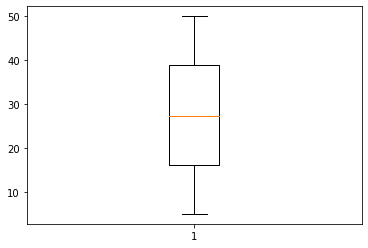

In [15]:

plt.boxplot("height(cm)",data=train)
plt.show()

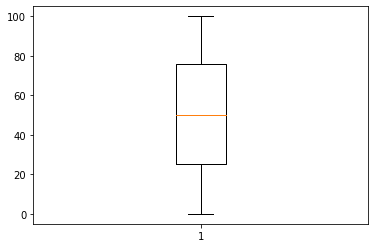

In [16]:
train["length(cm)"]=train["length(m)"]*100.0
plt.boxplot("length(cm)",data=train)
plt.show()

In [17]:
train[train['length(cm)']==0].groupby(['length(cm)','pet_category']).size()

length(cm)  pet_category
0.0         1               35
            2               56
            4                2
dtype: int64

In [18]:
val=train["length(cm)"].mean()
print(val)
val=round(val,2)
train.loc[train["length(cm)"]==0,["length(cm)"]]=val

50.263565891472865


### X1

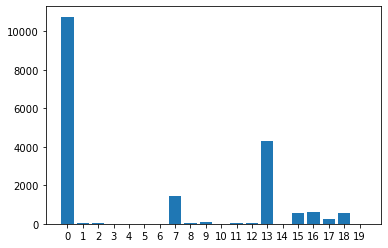

<Figure size 720x720 with 0 Axes>

In [19]:
y=train["X1"].value_counts()

plt.bar(y.index,y.values)
plt.xticks(y.index)
plt.figure(figsize=(10,10))
plt.show()

In [20]:
train.groupby(["X1"]).size()

X1
0     10752
1        51
2        24
3         1
4         7
5         3
6        11
7      1460
8        46
9       106
10        6
11       53
12       64
13     4280
14        2
15      554
16      603
17      260
18      548
19        3
dtype: int64

In [21]:
#create_dummies(train,'X1',[1,7,13,15,17,16,18],'X1')

In [22]:
#train.head()

In [23]:
train['issue_date']=pd.to_datetime(train['issue_date'])
train['listing_date']=pd.to_datetime(train['listing_date'])

In [24]:
train['issue_yr']=train.issue_date.dt.year
train['issue_month']=train.issue_date.dt.month
train['listing_yr']=train.listing_date.dt.year
train['listing_month']=train.listing_date.dt.month
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,length(cm),issue_yr,issue_month,listing_yr,listing_month
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,80.0,2016,7,2016,9
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,72.0,2013,11,2018,12
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,3.0,Brown,0.15,40.90,15,4,2.0,4,15.0,2014,9,2016,10
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,62.0,2016,12,2019,1
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,50.0,2017,9,2017,11


In [25]:

train['wait_time']=train['listing_date'].sub(train['issue_date'])
train['wait_time']=train['wait_time'].dt.days
train['wait_time']

0          73
1        1862
2         752
3         755
4          52
         ... 
18829     407
18830     386
18831    2954
18832     272
18833    2509
Name: wait_time, Length: 18834, dtype: int64

In [26]:
train['wait_time'].loc[train['wait_time']<0]=0

/home/aswin/anaconda3/envs/learn/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## Pet Id

In [27]:
train['pet_id']=train['pet_id'].str[5:6]
train['pet_id']=train['pet_id'].astype(int)

In [28]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,length(cm),issue_yr,issue_month,listing_yr,listing_month,wait_time
0,6,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,80.0,2016,7,2016,9,73
1,6,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,72.0,2013,11,2018,12,1862
2,6,2014-09-28,2016-10-19 08:24:00,3.0,Brown,0.15,40.90,15,4,2.0,4,15.0,2014,9,2016,10,752
3,7,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,62.0,2016,12,2019,1,755
4,5,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,50.0,2017,9,2017,11,52


In [29]:
pd.options.display.max_rows = 4000
train.groupby(['pet_category','pet_id']).size()

pet_category  pet_id
0             5           27
              6           39
              7           22
1             4            8
              5         2689
              6         2735
              7         1752
2             4            8
              5         3918
              6         3877
              7         2818
4             4            1
              5          365
              6          354
              7          221
dtype: int64

## Colour Type

In [30]:
train['color_cat']=pet_type(train['color_type'])
train.drop('color_type',axis=1,inplace=True)

In [31]:
train.groupby(['pet_category','color_cat']).size()

pet_category  color_cat
0             Black          16
              Blue            4
              Brown          10
              Gold            1
              Gray           18
              Green           5
              Orange          1
              Red             8
              Tan             2
              Tricolor        3
              White          15
              Yellow          5
1             Black        1681
              Blue          422
              Brown          12
              Buff            2
              Calico        338
              Chocolate       3
              Cream          25
              Gray           53
              Merle           1
              Orange         31
              Pink            1
              Point         337
              Silver          1
              Smoke          36
              Tabby        3193
              Tan             2
              Tiger           2
              Torbie        242
              To

In [32]:
dummy=pd.get_dummies(train.color_cat,drop_first=True)

In [33]:
for col in dummy:
    train["color_%s" % (col)]=dummy[col]
train.head()

,pet_id,issue_date,listing_date,condition,length(m),height(cm),X1,X2,breed_category,pet_category,...,color_Smoke,color_Tabby,color_Tan,color_Tick,color_Tiger,color_Torbie,color_Tortie,color_Tricolor,color_White,color_Yellow
0,6,2016-07-10,2016-09-21 16:25:00,2.0,0.80,7.78,13,9,0.0,1,...,0,1,0,0,0,0,0,0,0,0
1,6,2013-11-21,2018-12-27 17:47:00,1.0,0.72,14.19,13,9,0.0,2,...,0,0,0,0,0,0,0,0,1,0
2,6,2014-09-28,2016-10-19 08:24:00,3.0,0.15,40.90,15,4,2.0,4,...,0,0,0,0,0,0,0,0,0,0
3,7,2016-12-31,2019-01-25 18:30:00,1.0,0.62,17.82,0,1,0.0,2,...,0,0,0,0,0,0,0,0,1,0
4,5,2017-09-28,2017-11-19 09:38:00,2.0,0.50,11.06,18,4,0.0,1,...,0,0,0,0,0,0,0,0,0,0


## X1 & X2

In [34]:
create_dummies(train,'X1',[0,3,4,5,7,13,14,15,16,17,18,19],'X1')

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')


In [35]:
create_dummies(train,'X2',[1,4,7,9],'X2')
train.head()

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


,pet_id,issue_date,listing_date,condition,length(m),height(cm),X1,X2,breed_category,pet_category,...,X1_14,X1_15,X1_16,X1_17,X1_18,X1_19,X2_1,X2_4,X2_7,X2_9
0,6,2016-07-10,2016-09-21 16:25:00,2.0,0.80,7.78,13,9,0.0,1,...,0,0,0,0,0,0,0,0,0,1
1,6,2013-11-21,2018-12-27 17:47:00,1.0,0.72,14.19,13,9,0.0,2,...,0,0,0,0,0,0,0,0,0,1
2,6,2014-09-28,2016-10-19 08:24:00,3.0,0.15,40.90,15,4,2.0,4,...,0,1,0,0,0,0,0,1,0,0
3,7,2016-12-31,2019-01-25 18:30:00,1.0,0.62,17.82,0,1,0.0,2,...,0,0,0,0,0,0,1,0,0,0
4,5,2017-09-28,2017-11-19 09:38:00,2.0,0.50,11.06,18,4,0.0,1,...,0,0,0,0,1,0,0,1,0,0


In [36]:
y=train['pet_category']
train.drop(['breed_category','pet_category','issue_yr','issue_month','listing_yr','listing_month','color_cat','issue_date','listing_date'],axis=1,inplace=True)
features=list(train.columns)
y

0        1
1        2
2        4
3        2
4        1
        ..
18829    2
18830    4
18831    1
18832    2
18833    2
Name: pet_category, Length: 18834, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.2, random_state=0)

In [38]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators=300,random_state=0,min_samples_leaf=20)
model2.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=20, n_estimators=300, random_state=0)

In [41]:
pred_train=model2.predict(X_train)
pred_train.astype(int)
print("train model accuracy=",accuracy_score(y_train,pred_train.astype(int))*100)
pred_test=model2.predict(X_test)
print("test model accuracy=",accuracy_score(y_test,pred_test.astype(int))*100)

train model accuracy= 54.58950023229575
test model accuracy= 54.41996283514733


In [42]:
from xgboost import XGBClassifier
model3 = XGBClassifier()
model3.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
pred_train=model3.predict(X_train)
pred_train.astype(int)
print("train model accuracy=",accuracy_score(y_train,pred_train.astype(int))*100)
pred_test=model3.predict(X_test)
print("test model accuracy=",accuracy_score(y_test,pred_test.astype(int))*100)

train model accuracy= 93.94703656998739
test model accuracy= 90.62914786302098


# Encoding Techniques

## Ordinal Encoding
Preference to order

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [54]:
train2=pd.read_csv("train.csv")
enc=OrdinalEncoder()
enc.fit(train2['color_type'].values.reshape(len(train2),1))
enc.categories_

[array(['Agouti', 'Apricot', 'Black', 'Black Brindle', 'Black Smoke',
        'Black Tabby', 'Black Tiger', 'Blue', 'Blue Cream', 'Blue Merle',
        'Blue Point', 'Blue Smoke', 'Blue Tabby', 'Blue Tick',
        'Blue Tiger', 'Brown', 'Brown Brindle', 'Brown Merle',
        'Brown Tabby', 'Brown Tiger', 'Buff', 'Calico', 'Calico Point',
        'Chocolate', 'Chocolate Point', 'Cream', 'Cream Tabby', 'Fawn',
        'Flame Point', 'Gold', 'Gray', 'Gray Tabby', 'Green',
        'Lilac Point', 'Liver', 'Liver Tick', 'Lynx Point', 'Orange',
        'Orange Tabby', 'Pink', 'Red', 'Red Merle', 'Red Tick', 'Sable',
        'Seal Point', 'Silver', 'Silver Lynx Point', 'Silver Tabby', 'Tan',
        'Torbie', 'Tortie', 'Tortie Point', 'Tricolor', 'White', 'Yellow',
        'Yellow Brindle'], dtype=object)]

In [48]:
t=pd.DataFrame(train2['color_type'],columns=['color_type'])

t['color_code']=enc.transform(t.values.reshape(len(t),1))
t

,color_type,color_code
0,Brown Tabby,18.0
1,White,53.0
2,Brown,15.0
3,White,53.0
4,Black,2.0
...,...,...
18829,Tricolor,52.0
18830,Brown,15.0
18831,Calico Point,22.0
18832,Tan,48.0


RecursionError: maximum recursion depth exceeded

In [ ]:
train.head()

In [ ]:
enc.categories_